# Model Evaluation Exercise

## Regression evaluation

In [1]:
# import numpy
import numpy as np

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_features=10, n_samples=1000, noise=10)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [3]:
from sklearn.linear_model import LinearRegression, Ridge

In [4]:
# creating linear regression
lr = LinearRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [5]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

_________________________
## Mean Absolute Error (MAE)


**Write the definition to the mean absolute error (MAE) below and how to interpret it?**
> *The MAE refers too....*

* import **mean_absolute_error** from sklearn

In [6]:
from sklearn.metrics import mean_absolute_error

* compute MAE

In [7]:
MAE_lr = mean_absolute_error(y, y_lr)
MAE_rr = mean_absolute_error(y, y_rr)

print(MAE_lr) # Linear regression
print(MAE_rr) # ridge regression

7.642085514488937
7.6421227271627


* According to MAE, what is the better model?

In [8]:
MAE_lr - MAE_rr # They're not far off...

-3.721267376377568e-05

____________________________________
## R2 - Coefficient of Determination

**Write the definition to the R2 score below and how to interpret it?**
> *The R2 refers too....*

* import **r2_score** from sklearn

In [9]:
from sklearn.metrics import r2_score

* compute R2

In [10]:
R2_lr = r2_score(y, y_lr, multioutput='variance_weighted')
R2_rr = r2_score(y, y_rr, multioutput='variance_weighted')
print(R2_lr)
print(R2_rr)

0.9963629469980768
0.9963629369006468


* According to R2, what is the better model?

In [11]:
R2_lr - R2_rr

1.0097430003241925e-08

* (Stretch) use predictions from linear regression and compute adjusted R2

________________________________
## Classification evaluation

In [12]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [13]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [14]:
# creating linear regression
lr = LogisticRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [15]:
y_lr.shape

(1000,)

In [16]:
# creating ridge regression
rr = RidgeClassifier(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

## Precision score

**Write the definition to the Precision score below and how to interpret it?**
> *The Precision score refers too....*

* import **precision_score** from sklearn

In [17]:
from sklearn.metrics import precision_score

* compute precision

In [18]:
PREC_lr = precision_score(y, y_lr, average='macro')
PREC_rr = precision_score(y, y_rr, average='macro')

* print precision

In [19]:
print(PREC_lr, PREC_rr)

0.9673159055521532 0.9699945083797314


## Recall score

**Write the definition to the Recall score below and how to interpret it?**
> *The Recall score refers too....*

* import **recal_score** from sklearn

In [20]:
from sklearn.metrics import recall_score

* compute recall

In [21]:
recall_lr = recall_score(y, y_lr, average='macro')
recall_rr = recall_score(y, y_rr, average='macro')

* print recall

In [22]:
print(recall_lr)
print(recall_rr)

0.967
0.969


## ROC curve

**What is the ROC curve? How do you interpret it?**
> *The ROC curve refers too....*

* import **roc_curve** from sklearn

In [23]:
from sklearn.metrics import roc_curve

* compute and store ROC curve values in fpr, tpr, thresholds variables

In [24]:
y.shape

(1000,)

In [37]:
import numpy as np
from sklearn import metrics
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y, y_lr, pos_label=1)
fpr_rr, tpr_rr, thresholds_rr = metrics.roc_curve(y, y_rr, pos_label=1)

In [38]:
print(fpr_lr)
print(tpr_lr)
print(thresholds_lr)
print(fpr_rr)
print(tpr_rr)
print(thresholds_rr)

[0.   0.02 1.  ]
[0.    0.954 1.   ]
[2 1 0]
[0.    0.008 1.   ]
[0.    0.946 1.   ]
[2 1 0]


* import matplotlib 

In [41]:
import matplotlib.pyplot as plt

* plot ROC

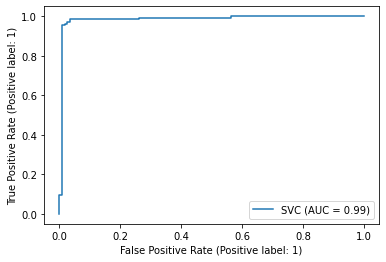

In [42]:
from sklearn import datasets, metrics, model_selection, svm
# X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
# SVC(random_state=0)
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers too...*

* import **log_loss** from sklearn

In [43]:
from sklearn.metrics import log_loss

* compute log_loss

In [45]:
lloss_lr = log_loss(y, y_lr)
lloss_rr = log_loss(y, y_rr)

* print log_loss

In [46]:
print(lloss_lr)
print(lloss_rr)

1.1397876170063552
1.0707052666319528


#### Q: According to metrics above, which one is the better model?

In [47]:
lloss_lr - lloss_rr # pretty close, but LR

0.06908235037440247

# stretch, plotting log_loss

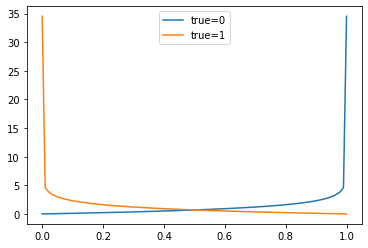

In [52]:
# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses_0, label='true=0')
pyplot.plot(yhat, losses_1, label='true=1')
pyplot.legend()
pyplot.show()

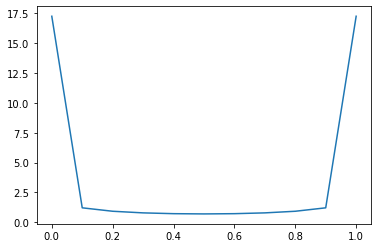

In [53]:
# plot impact of logloss with balanced datasets
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# define a balanced dataset
testy = [0 for x in range(50)] + [1 for x in range(50)]
# loss for predicting different fixed probability values
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = [log_loss(testy, [y for x in range(len(testy))]) for y in predictions]
# plot predictions vs loss
pyplot.plot(predictions, losses)
pyplot.show()

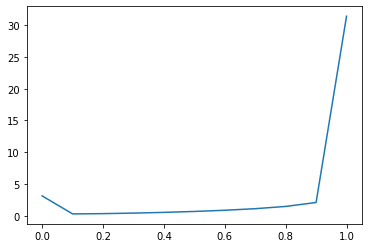

In [54]:
# plot impact of logloss with imbalanced datasets
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# define an imbalanced dataset
testy = [0 for x in range(100)] + [1 for x in range(10)]
# loss for predicting different fixed probability values
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = [log_loss(testy, [y for x in range(len(testy))]) for y in predictions]
# plot predictions vs loss
pyplot.plot(predictions, losses)
pyplot.show()

# brier score (stretch)

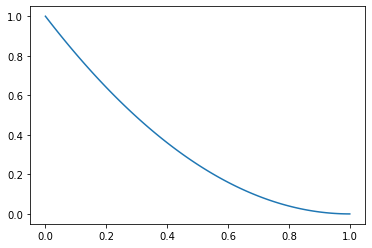

In [56]:
# plot impact of brier for single forecasts
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 1 true value
losses = [brier_score_loss([1], [x], pos_label=[1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses)
pyplot.show()

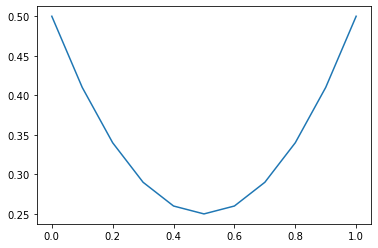

In [57]:
# plot impact of brier score with balanced datasets
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot
from numpy import array
# define a balanced dataset
testy = [0 for x in range(50)] + [1 for x in range(50)]
# brier score for predicting different fixed probability values
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = [brier_score_loss(testy, [y for x in range(len(testy))]) for y in predictions]
# plot predictions vs loss
pyplot.plot(predictions, losses)
pyplot.show()

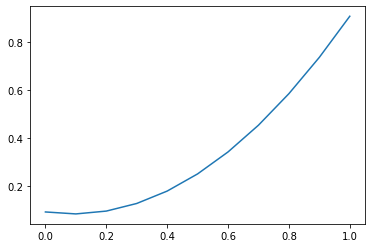

In [58]:
# plot impact of brier score with imbalanced datasets
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot
from numpy import array
# define an imbalanced dataset
testy = [0 for x in range(100)] + [1 for x in range(10)]
# brier score for predicting different fixed probability values
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = [brier_score_loss(testy, [y for x in range(len(testy))]) for y in predictions]
# plot predictions vs loss
pyplot.plot(predictions, losses)
pyplot.show()

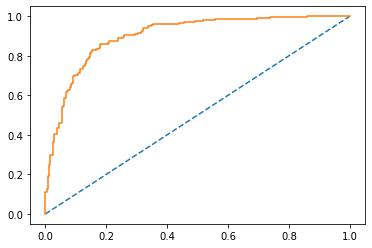

In [59]:
# roc curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression()
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()

In [61]:
# roc auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression()
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc auc
auc = roc_auc_score(testy, probs)
print(auc)

0.9028205128205128
